In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## hide test on digits

In [3]:
# Define hyperparameters
learning_rate = 0.01
num_epochs = 10
batch_size = 32

In [3]:
# Define data loaders
train_loader = torch.utils.data.DataLoader(dataset=datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True), batch_size=batch_size, shuffle=False)

In [4]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [13]:
np.max(images[0,0].numpy())

1.0

In [20]:
for i, (images, labels) in enumerate(test_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


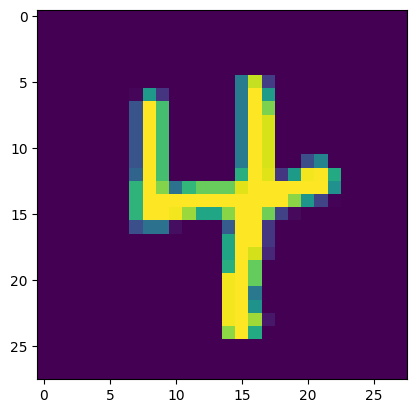

In [14]:
plt.imshow(images[0,0])

In [9]:

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
        
# Initialize the model
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/5], Step [100/938], Loss: 0.1761
Epoch [1/5], Step [200/938], Loss: 0.1290
Epoch [1/5], Step [300/938], Loss: 0.2390
Epoch [1/5], Step [400/938], Loss: 0.0302
Epoch [1/5], Step [500/938], Loss: 0.0942
Epoch [1/5], Step [600/938], Loss: 0.0604
Epoch [1/5], Step [700/938], Loss: 0.0563
Epoch [1/5], Step [800/938], Loss: 0.0189
Epoch [1/5], Step [900/938], Loss: 0.0905
Epoch [2/5], Step [100/938], Loss: 0.0598
Epoch [2/5], Step [200/938], Loss: 0.0187
Epoch [2/5], Step [300/938], Loss: 0.0741
Epoch [2/5], Step [400/938], Loss: 0.0086
Epoch [2/5], Step [500/938], Loss: 0.1531
Epoch [2/5], Step [600/938], Loss: 0.0438
Epoch [2/5], Step [700/938], Loss: 0.1418
Epoch [2/5], Step [800/938], Loss: 0.0111
Epoch [2/5], Step [900/938], Loss: 0.0287
Epoch [3/5], Step [100/938], Loss: 0.0207
Epoch [3/5], Step [200/938], Loss: 0.0365
Epoch [3/5], Step [300/938], Loss: 0.0769
Epoch [3/5], Step [400/938], Loss: 0.0495
Epoch [3/5], Step [500/938], Loss: 0.0133
Epoch [3/5], Step [600/938], Loss:

In [16]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 99.02 %


In [21]:
for images, labels in test_loader:
        outputs = model(images)
        print(images.shape)
        print(labels.shape)
        print(outputs.shape)
        break

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 10])


## load all

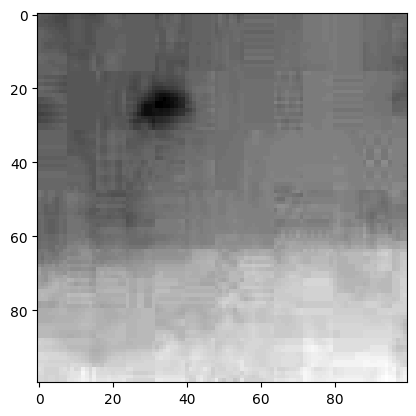

In [92]:
X_small_all=np.load('X_small_train.npy')
XX_all=np.zeros((X_small_all.shape[0], 3, 100, 100)).astype(np.float32)
for i in range(X_small_all.shape[0]):
    temp =np.zeros((3,100,100))
    temp[0]=X_small_all[i, :, :, 0]/255
    temp[1]=X_small_all[i, :, :, 1]/255
    temp[2]=X_small_all[i, :, :, 2]/255
    XX_all[i]=temp
plt.imshow(XX_all[0,0],cmap='gray')

In [96]:
YY_all=np.load('Y_small_train.npy')
YY_all.shape

(1960,)

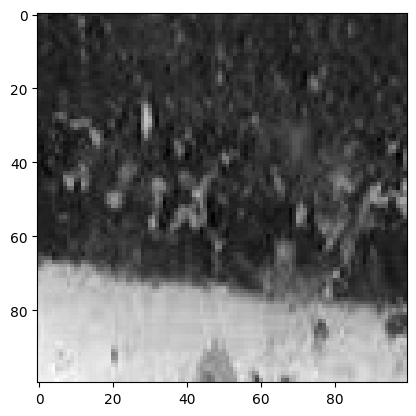

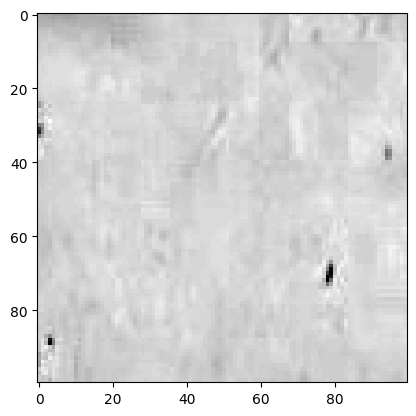

0.0
0.0


In [101]:
count=np.random.choice(XX_all.shape[0], XX_all.shape[0], replace=False)
YY_all=YY_all[count]
XX_all=XX_all[count]
plt.imshow(XX_all[0,0],cmap='gray')
plt.show()
plt.imshow(XX_all[1,0],cmap='gray')
plt.show()
print(YY_all[0])
print(YY_all[1])

In [102]:
max(YY_all)

13.0

## load big

In [19]:
X=np.load('X_train.npy')
X.shape

(14, 1080, 1440, 3)

In [5]:
Y=np.load('Y_train.npy')
Y.shape

(14, 1080, 1440)

In [10]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    #print(mu,sigma)
    return (data - mu) / sigma

In [21]:
norme_X,mu,sig=standardization(X)

In [17]:
standardization([[1.1,2.1,3],[1,2,3]])

/var/folders/2r/9qy6_yrj3hz_h1xfq66mhfl80000gn/T/ipykernel_84583/734717772.py:10: RuntimeWarning: invalid value encountered in true_divide
  return ((data - mu) / sigma,mu,sigma)


(array([[ 1.,  1., nan],
        [-1., -1., nan]]),
 array([1.05, 2.05, 3.  ]),
 array([0.05, 0.05, 0.  ]))

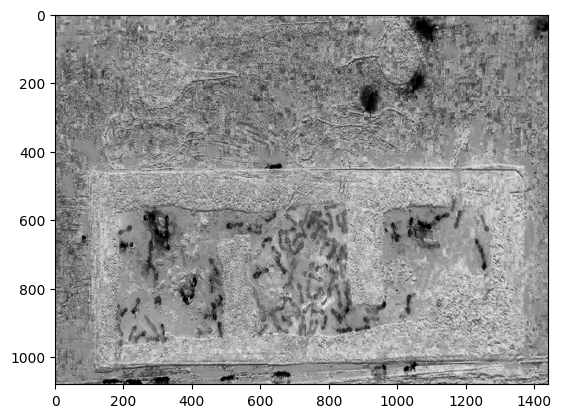

In [22]:
XX_big=np.zeros((X.shape[0], 3, X.shape[1],X.shape[2])).astype(np.float32)
for i in range(X.shape[0]):
    temp =np.zeros((3,X.shape[1],X.shape[2]))
    temp[0]=(X[i, :, :, 0]-mu[:,:,0])/sig[:,:,0]
    temp[1]=(X[i, :, :, 1]-mu[:,:,0])/sig[:,:,0]
    temp[2]=(X[i, :, :, 2]-mu[:,:,0])/sig[:,:,0]
    XX_big[i]=temp
plt.imshow(XX_big[0,0],cmap='gray')

0.0


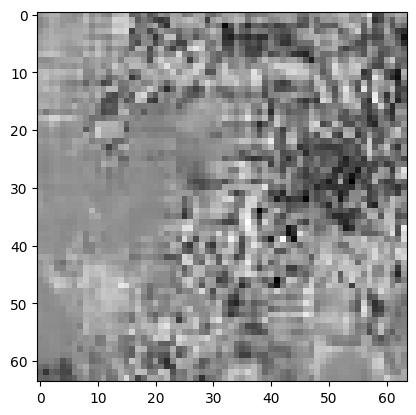

0.0


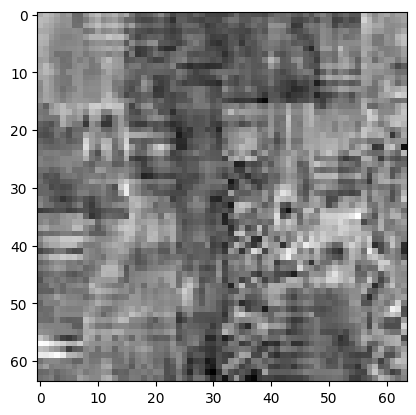

In [45]:
len_i=X.shape[1]//64
len_j=X.shape[2]//64
XX_frac=np.zeros((len_i*len_j*X.shape[0],3,64,64))
YY_frac=np.zeros(len_i*len_j*X.shape[0])
for pic in range(X.shape[0]):
    for i in range (len_i):
        for j in range(len_j):
            XX_frac[j+i*len_j+len_i*len_j*pic]=XX_big[pic,:,64*i:64*(i+1),64*j:64*(j+1)]
            YY_frac[j+i*len_j+len_i*len_j*pic]=np.sum(Y[pic,64*i:64*(i+1),64*j:64*(j+1)])

count=np.random.choice(XX_frac.shape[0], XX_frac.shape[0], replace=False)
YY_frac=YY_frac[count]
XX_frac=XX_frac[count]

plt.imshow(XX_frac[0,0],cmap='gray')
print(YY_frac[0])
plt.show()
plt.imshow(XX_frac[1,0],cmap='gray')
print(YY_frac[1])
plt.show()

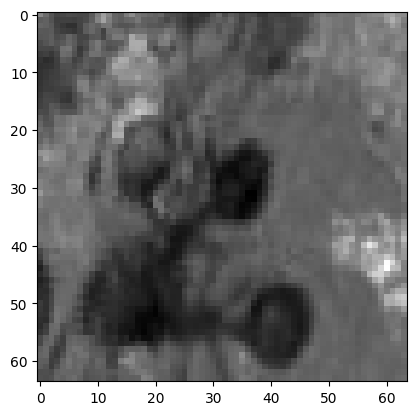

In [69]:
plt.imshow(XX_frac[150,2],cmap='gray')

In [67]:
YY_frac[150]

4.0

## load small

In [6]:
Y_small=np.load('Y_small_train62.npy')
Y_small.shape

(1300,)

In [4]:
X_small=np.load('X_small_train12992.npy')
X_small.shape

(5200, 100, 100, 3)

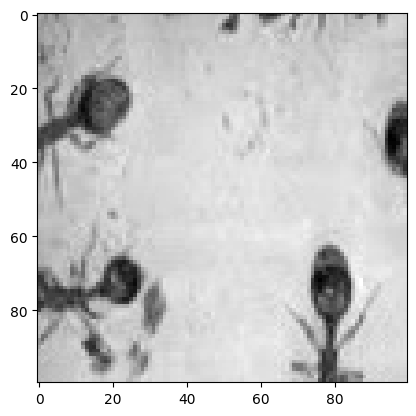

In [5]:
XX=np.zeros((X_small.shape[0], 3, 100, 100)).astype(np.float32)
for i in range(X_small.shape[0]):
    temp =np.zeros((3,100,100))
    temp[0]=X_small[i, :, :, 0]/255
    temp[1]=X_small[i, :, :, 1]/255
    temp[2]=X_small[i, :, :, 2]/255
    XX[i]=temp
plt.imshow(XX[0,0],cmap='gray')

In [7]:
YY=np.zeros(X_small.shape[0])
for i in range(Y_small.shape[0]):
    YY[4*i]=Y_small[i]
    YY[4*i+1]=Y_small[i]
    YY[4*i+2]=Y_small[i]
    YY[4*i+3]=Y_small[i]
YY

array([3., 3., 3., ..., 2., 2., 2.])

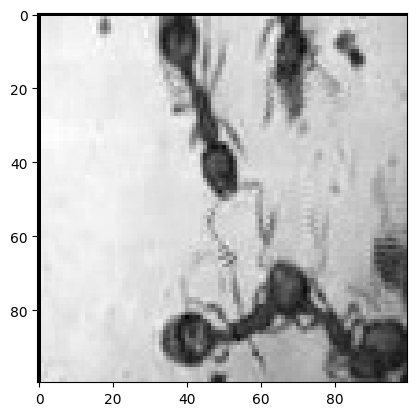

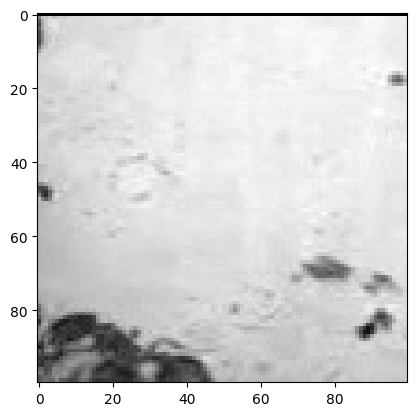

4.0
1.0


In [8]:
count=np.random.choice(XX.shape[0], XX.shape[0], replace=False)
YY=YY[count]
XX=XX[count]
plt.imshow(XX[0,0],cmap='gray')
plt.show()
plt.imshow(XX[1,0],cmap='gray')
plt.show()
print(YY[0])
print(YY[1])

## Train small

In [95]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(6*6*32, 7)
        
    def forward(self, x):
        out = self.layer1(x)
        #print(out.shape)
        out = self.layer2(out)
        #print(out.shape)
        out = out.reshape(out.size(0), -1)
        #print(out.shape)
        out = self.fc(out)
        #print(out.shape)
        return out
        
# Initialize the model
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
loss_old=0
num_epochs=5
# Train the model
for epoch in range(num_epochs):
    for i in range (0,5120,batch_size):
        images=torch.from_numpy(XX[i:i+batch_size])
        labels=torch.from_numpy(YY[i:i+batch_size])
        outputs = model(images)
        loss = criterion(outputs, labels.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i!=0 and (5120//i) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i, 5120, loss.item()))
    if abs(loss_old-loss.item())<0.0001 and loss.item()<1:
        print('converge')
        break
    loss_old=loss.item()


In [24]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for i in range (5120,5200,batch_size):
        images=torch.from_numpy(XX[i:i+batch_size])
        labels=torch.from_numpy(YY[i:i+batch_size])
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 100 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 100 test images: 81.25 %


In [18]:
torch.max(outputs.data, 1)[1]

tensor([3, 0, 1, 1, 2, 3, 3, 4, 2, 2, 0, 5, 1, 3, 1, 0])

In [19]:
labels.int()

tensor([3, 1, 2, 1, 2, 4, 3, 4, 2, 2, 1, 5, 1, 3, 2, 1], dtype=torch.int32)

In [25]:
def evaluate(model):
    model.eval()
    true_positives = torch.zeros(10)
    false_positives = torch.zeros(10)
    false_negatives = torch.zeros(10)
    total_correct = 0
    total = 0
    with torch.no_grad():
        for i in range (5120,5200,batch_size):
            images=torch.from_numpy(XX[i:i+batch_size])
            labels=torch.from_numpy(YY[i:i+batch_size])
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i in range(7):
                true_positives[i] += ((predicted == i) & (labels == i)).sum().item()
                false_positives[i] += ((predicted == i) & (labels != i)).sum().item()
                false_negatives[i] += ((predicted != i) & (labels == i)).sum().item()

    accuracy = total_correct / total
    precision = true_positives / (true_positives + false_positives + 1e-6)
    recall = true_positives / (true_positives + false_negatives + 1e-6)
    f1 = 2 * precision * recall / (precision + recall + 1e-6)

    return accuracy, precision.mean().item(), recall.mean().item(), f1.mean().item()


In [26]:
evaluate(model)

(0.8125, 0.47455137968063354, 0.5032250285148621, 0.4793570041656494)

In [80]:
Y_pred=[]
Y_true=[]
pic_num=100
for i in range(0,X_3.shape[2]-100,100):
    for j in range(0,X_3.shape[3]-100,100):
        XX=X_3[pic_num,:,i:i+100,j:j+100].reshape(1,3,100,100)
        YY=Y[pic_num,i:i+100,j:j+100].reshape(1,-1)
        # Test the model
        images=torch.from_numpy(XX)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        Y_pred.append(predicted.item())
        Y_true.append(np.sum(YY))

## Train all

In [72]:
loss_old=0
num_epochs=10
batch_size=32
learning_rate=0.001

In [93]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(4*4*32, 6)
        
    def forward(self, x):
        out = self.layer1(x)
        #print(out.shape)
        out = self.layer2(out)
        #print(out.shape)
        out = out.reshape(out.size(0), -1)
        #print(out.shape)
        out = self.fc(out)
        #print(out.shape)
        return out
        
# Initialize the model
model_frac = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_frac.parameters(), lr=learning_rate)

In [94]:
# Train the model
for epoch in range(num_epochs):
    count=0
    for i in range (0,YY_frac.shape[0],batch_size):
        count+=1
        images=torch.from_numpy(XX_frac[i:i+batch_size]).float()
        labels=torch.from_numpy(YY_frac[i:i+batch_size])
        outputs = model_frac(images)
        loss = criterion(outputs, labels.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if count % 50 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i, YY_frac.shape[0], loss.item()))
    if abs(loss_old-loss.item())<0.001 and loss.item()<1:
        print('converge')
        break
    loss_old=loss.item()


Epoch [1/10], Step [1568/4928], Loss: 0.4739
Epoch [1/10], Step [3168/4928], Loss: 0.6170
Epoch [1/10], Step [4768/4928], Loss: 0.4084
Epoch [2/10], Step [1568/4928], Loss: 0.2993
Epoch [2/10], Step [3168/4928], Loss: 0.4889
Epoch [2/10], Step [4768/4928], Loss: 0.3580
Epoch [3/10], Step [1568/4928], Loss: 0.2364
Epoch [3/10], Step [3168/4928], Loss: 0.4176
Epoch [3/10], Step [4768/4928], Loss: 0.3485
Epoch [4/10], Step [1568/4928], Loss: 0.2483
Epoch [4/10], Step [3168/4928], Loss: 0.3987
Epoch [4/10], Step [4768/4928], Loss: 0.3012
Epoch [5/10], Step [1568/4928], Loss: 0.2379
Epoch [5/10], Step [3168/4928], Loss: 0.3700
Epoch [5/10], Step [4768/4928], Loss: 0.2878
Epoch [6/10], Step [1568/4928], Loss: 0.2110
Epoch [6/10], Step [3168/4928], Loss: 0.3443
Epoch [6/10], Step [4768/4928], Loss: 0.2542
Epoch [7/10], Step [1568/4928], Loss: 0.2084
Epoch [7/10], Step [3168/4928], Loss: 0.3178
Epoch [7/10], Step [4768/4928], Loss: 0.2061
Epoch [8/10], Step [1568/4928], Loss: 0.2008
Epoch [8/1

In [104]:
def evaluate(model):
    model.eval()
    true_positives = torch.zeros(10)
    false_positives = torch.zeros(10)
    false_negatives = torch.zeros(10)
    total_correct = 0
    total = 0
    with torch.no_grad():
        for i in range (YY_frac.shape[0]-batch_size,YY_frac.shape[0]-batch_size*5,-batch_size):
            images=torch.from_numpy(XX_frac[i:i+batch_size]).float()
            labels=torch.from_numpy(YY_frac[i:i+batch_size])
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i in range(7):
                true_positives[i] += ((predicted == i) & (labels == i)).sum().item()
                false_positives[i] += ((predicted == i) & (labels != i)).sum().item()
                false_negatives[i] += ((predicted != i) & (labels == i)).sum().item()

    accuracy = total_correct / total
    precision = true_positives / (true_positives + false_positives + 1e-6)
    recall = true_positives / (true_positives + false_negatives + 1e-6)
    f1 = 2 * precision * recall / (precision + recall + 1e-6)

    return accuracy, precision.mean().item(), recall.mean().item(), f1.mean().item()

In [103]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for i in range (4000,4800,batch_size):
        images=torch.from_numpy(XX_frac[i:i+batch_size])
        labels=torch.from_numpy(YY_frac[i:i+batch_size])
        outputs = model_frac(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 100 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 100 test images: 95.375 %


In [105]:
evaluate(model_frac)

(0.9609375, 0.3755089342594147, 0.358562171459198, 0.36290913820266724)

In [106]:
len_i=X.shape[1]//64
len_j=X.shape[2]//64
XX_frac=np.zeros((len_i*len_j*X.shape[0],3,64,64))
YY_frac=np.zeros(len_i*len_j*X.shape[0])
for pic in range(X.shape[0]):
    for i in range (len_i):
        for j in range(len_j):
            XX_frac[j+i*len_j+len_i*len_j*pic]=XX_big[pic,:,64*i:64*(i+1),64*j:64*(j+1)]
            YY_frac[j+i*len_j+len_i*len_j*pic]=np.sum(Y[pic,64*i:64*(i+1),64*j:64*(j+1)])

In [123]:
def evaluate_pic(model,pic):
    model.eval()
    with torch.no_grad():
        images=torch.from_numpy(XX_frac[len_i*len_j*pic:len_i*len_j*(pic+1)]).float()
        labels=torch.from_numpy(YY_frac[len_i*len_j*pic:len_i*len_j*(pic+1)])
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        #print(labels,predicted)
        print(sum(labels),sum(predicted))

In [124]:
for i in range(14):
    print('--- ', i ,' image---')
    evaluate_pic(model_frac,i)

---  0  image---
tensor(101., dtype=torch.float64) tensor(103)
---  1  image---
tensor(105., dtype=torch.float64) tensor(108)
---  2  image---
tensor(102., dtype=torch.float64) tensor(98)
---  3  image---
tensor(103., dtype=torch.float64) tensor(108)
---  4  image---
tensor(107., dtype=torch.float64) tensor(116)
---  5  image---
tensor(116., dtype=torch.float64) tensor(111)
---  6  image---
tensor(101., dtype=torch.float64) tensor(105)
---  7  image---
tensor(109., dtype=torch.float64) tensor(107)
---  8  image---
tensor(108., dtype=torch.float64) tensor(110)
---  9  image---
tensor(111., dtype=torch.float64) tensor(103)
---  10  image---
tensor(103., dtype=torch.float64) tensor(101)
---  11  image---
tensor(105., dtype=torch.float64) tensor(106)
---  12  image---
tensor(104., dtype=torch.float64) tensor(101)
---  13  image---
tensor(99., dtype=torch.float64) tensor(95)


## Test

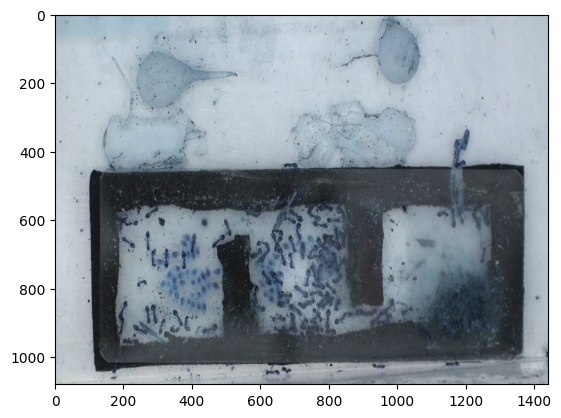

In [141]:
import cv2
s='1193'
img = cv2.imread('{}.jpg'.format(s))    
plt.imshow(img,cmap='gray')

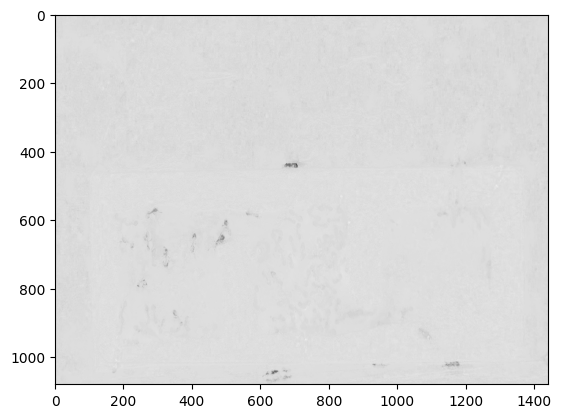

In [114]:
XX_img=np.zeros((1, 3, X.shape[1],X.shape[2])).astype(np.float32)

XX_img[0,0]=(img[:, :, 0]-mu[:,:,0])/sig[:,:,0]
XX_img[0,1]=(img[:, :, 1]-mu[:,:,0])/sig[:,:,0]
XX_img[0,2]=(img[:, :, 2]-mu[:,:,0])/sig[:,:,0]

plt.imshow(XX_img[0,0],cmap='gray')

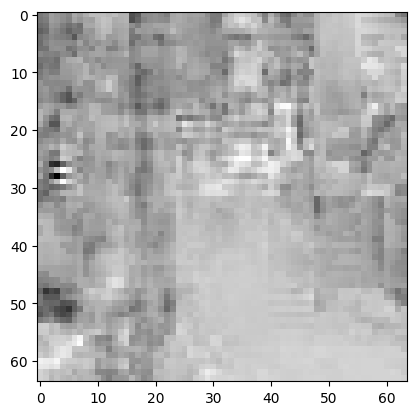

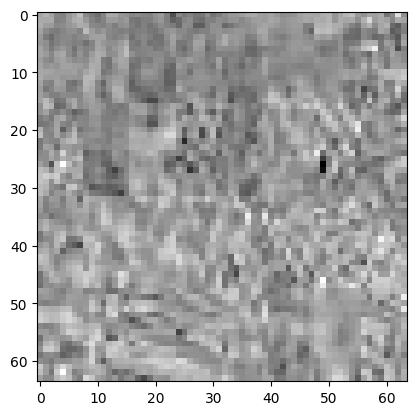

In [120]:
len_i=img.shape[0]//64
len_j=img.shape[1]//64
img_frac=np.zeros((len_i*len_j,3,64,64))

for i in range (len_i):
    for j in range(len_j):
        img_frac[j+i*len_j]=XX_img[:,:,64*i:64*(i+1),64*j:64*(j+1)]

plt.imshow(img_frac[0,0],cmap='gray')
plt.show()
plt.imshow(img_frac[100,0],cmap='gray')
plt.show()

In [117]:
XX_img[:,64*i:64*(i+1),64*j:64*(j+1)].shape

(1, 3, 64, 1440)

In [131]:
model_frac.eval()
with torch.no_grad():
    images=torch.from_numpy(img_frac).float()
    outputs = model_frac(images)
    _, predicted = torch.max(outputs.data, 1)
    #print(labels,predicted)
    print(sum(predicted))

tensor(105)


In [126]:
len_i,len_j

(16, 22)

In [128]:
len_i*64,len_j*64

(1024, 1408)

In [132]:
predicted

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 3, 2, 1, 0, 1, 0, 1,
        3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 2, 2, 3, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 2, 1, 0, 0, 0, 1, 3, 3, 2,

In [133]:
predicted[0]

tensor(0)

In [135]:
predicted[j+i*len_j].item()

0

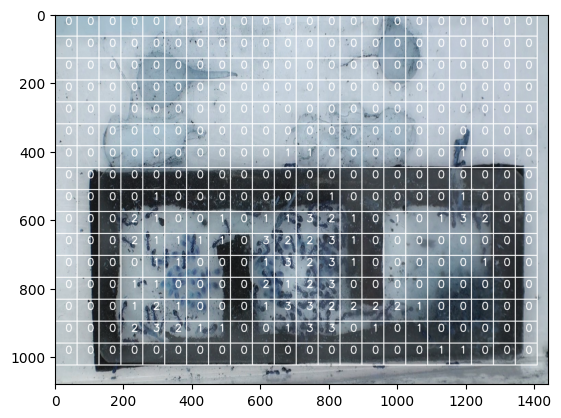

In [142]:
for i in range(len_i):
    for j in range(len_j):
        cv2.rectangle(img,(j*64, i*64), ((j+1) * 64, (i+1) * 64), (255, 255, 255), 2)
        cv2.putText(img, str(predicted[j+i*len_j].item()), (j*64+30, i*64+30), cv2.FONT_ITALIC, 1, (255, 255, 255), 2)

plt.imshow(img)

In [1]:
torch.save(model_frac,'model_frac.pkl')

NameError: name 'torch' is not defined

In [145]:
np.save('sig.npy',sig)
np.save('mu.npy',mu)